Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [36]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm

%matplotlib inline

df = pd.read_csv('Train.csv')
df2 = pd.read_csv('Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [21]:
# Only missing values in Item_weight and Outlet_size, we'll impute these values
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [22]:
# Dropping the ID columns because we don't need them and dealing with categorical variables
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [31]:
# Creating train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train , test = train_test_split(df, test_size = 0.3, random_state = 38)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']


print('The number of observations in training: {}'.format(len(x_train)))
print('The number of observations in test: {}'.format(len(x_test)))

s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

The number of observations in training: 5966
The number of observations in test: 2557


In [24]:
# Data pre-processing
# Scaling the variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [46]:
mean = df['Item_Outlet_Sales'].mean()
print(mean)

2181.288913575032


## KNN Regression

In [25]:
# Checking the error rate for different k values
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1606.920363448656
RMSE value for k=  2 is: 1386.692815092366
RMSE value for k=  3 is: 1297.3073124376238
RMSE value for k=  4 is: 1261.690739530833
RMSE value for k=  5 is: 1242.3315702366492
RMSE value for k=  6 is: 1240.4309903483347
RMSE value for k=  7 is: 1236.9293203992202
RMSE value for k=  8 is: 1235.653342578943
RMSE value for k=  9 is: 1230.634392752585
RMSE value for k=  10 is: 1229.1447405012216
RMSE value for k=  11 is: 1230.3182560633516
RMSE value for k=  12 is: 1229.7188625254898
RMSE value for k=  13 is: 1232.8089646922463
RMSE value for k=  14 is: 1233.6463920058168
RMSE value for k=  15 is: 1237.629899604465
RMSE value for k=  16 is: 1239.6916705371348
RMSE value for k=  17 is: 1245.1487534436483
RMSE value for k=  18 is: 1250.8149998437586
RMSE value for k=  19 is: 1256.5739212528106
RMSE value for k=  20 is: 1262.8770651829927


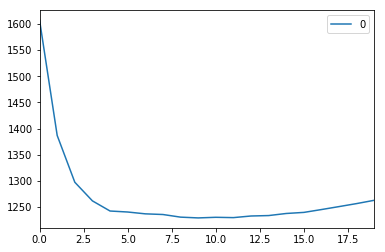

In [26]:
# Plotting the rmse values against k values, elbow method
curve = pd.DataFrame(rmse_val)
curve.plot()
# Looks like the best value for K is around 8

In [27]:
# Now the test data set

test_df = pd.read_csv('Test.csv')
df2['Item_Identifier'] = test_df['Item_Identifier']
df2['Outlet_Identifier'] = test_df['Outlet_Identifier']

# Pre-processing test dataset
test_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test_df['Item_Weight'].fillna(mean, inplace =True)
test_df = pd.get_dummies(test_df)
test_scaled = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_scaled)

# Predicting on the test set
predict = model.predict(test_df)
df2['Item_Outlet_Sales'] = predict
print(df2)


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
5              FDH56        9.800          Regular         0.063817   
6              FDL48       19.350          Regular         0.082602   
7              FDC48          NaN          Low Fat         0.015782   
8              FDN33        6.305          Regular         0.123365   
9              FDA36        5.985          Low Fat         0.005698   
10             FDT44       16.600          Low Fat         0.103569   
11             FDQ56        6.590          Low Fat         0.105811   
12             NCC54          NaN          Low Fat         0.171079   
13    

In [28]:
# Using gridsearch to find the best k value

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
knn_w = KNeighborsRegressor(n_neighbors=9, weights='distance')

knn_w.fit(x_train, y_train)
y_train_pred = knn_w.predict(x_train)
y_test_pred = knn_w.predict(x_test)
score_w_train = cross_val_score(knn_w, x_train, y_train, cv=5)
score_w_test = cross_val_score(knn_w, x_test, y_test, cv=5)

print('knn regression with 9 neighbors')
print('Training R-squared : {:.2f}'.format(score_w_train.mean()))
print('Training RMSE : {:.0f}'.format(rmse(y_train, y_train_pred)))
print('Test R-squared: {:.2f}'.format(score_w_test.mean()))
print('Test RMSE: {:.0f}'.format(rmse(y_test, y_test_pred)))

knn regression with 9 neighbors
Training R-squared : 0.46
Training RMSE : 0
Test R-squared: 0.38
Test RMSE: 1274


#### Analysis
The gap between the training R-squared and test R-squared is somewhat high and indicative of overfitting the training set. This could be managed some by adjusting the number of neighbors to decrease the overfitting. The RMSE here is closer to the mean price of an item, but not by much, and it is still far lower than the average. Given that the inclusion of more features is needed for both models and this dataset alone has more potential for categorical variables, I do not think that knn regression is the right choice.

## OLS Regression

In [41]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
print('The R-squared of the Training Set is: {:0.2f}'.format(lreg.score(x_train, y_train)))
print('The RMSE of the Training Set is: {:.0f}'.format(rmse(y_train, y_train_pred)))

print('The R-squared of the Test Set is: {:0.2f}'.format(lreg.score(x_test, y_test)))
print('The RMSE of the Test Set is: {:.0f}'.format(rmse(y_test, y_test_pred)))

The R-squared of the Training Set is: 0.57
The RMSE of the Training Set is: 1115
The R-squared of the Test Set is: 0.54
The RMSE of the Test Set is: 1161


#### Analysis
The gap between the training R-squared and test R-squared is relatively low, only 0.03 as compared to 0.12 in the KNN Regression. The results from the test set of OLS regression are much better than that of the KNN model with a better R-squared and lower RMSE. The RMSE of the test set is less than the average price of an item which shows that the model is performing alright, but it is significantly lower, so this prediction could be better. The RMSE of the test and the training sets are very close, so this is a good sign. If I were to choose one of the two methods shown here, I would pick OLS Regression over KNN.